<a href="https://colab.research.google.com/github/DzikriDhaniawan/student_skill_vs_salary/blob/main/student_placement_and_skills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project ini digunakan untuk EDA (Exploratory Data Analysis) dan juga regresi menggunakan Random Forest Classifier

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [2]:
path = kagglehub.dataset_download("alhamdulliah123/student-placement-and-skills-analytics-dataset-2025")

print(path)

Using Colab cache for faster access to the 'student-placement-and-skills-analytics-dataset-2025' dataset.
/kaggle/input/student-placement-and-skills-analytics-dataset-2025


In [3]:
import os
os.listdir(path)

['Student_Placement_Skills_2025.csv']

In [4]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "Student_Placement_Skills_2025.csv"))

df.head()

,Student_ID,Gender,Age,Degree,CGPA,Internships_Count,Projects_Count,Certifications_Count,Technical_Skills_Score_100,Communication_Skills_Score_100,Aptitude_Test_Score_100,Placement_Offer,Salary_Offered_USD
0,1,Male,19,Business,2.56,3,8,0,64,42,57,Yes,8047.08
1,2,Female,27,Engineering,3.66,0,5,2,78,54,40,Yes,3518.56
2,3,Male,26,Data Science,3.73,0,5,1,61,54,49,No,11791.75
3,4,Male,18,Computer Science,2.21,2,8,5,66,42,72,Yes,13946.28
4,5,Male,20,Business,2.59,3,9,2,69,50,53,No,10951.66


In [5]:
df = df.drop(columns=["Student_ID"])

Memeriksa apakah terdapat missing value pada dataset

In [6]:
df.isnull().sum()

,0
Gender,0
Age,0
Degree,0
CGPA,0
Internships_Count,0
Projects_Count,0
Certifications_Count,0
Technical_Skills_Score_100,0
Communication_Skills_Score_100,0
Aptitude_Test_Score_100,0


import library yang dibutuhkan untuk menganalisa data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

Memeriksa distribusi degree

In [8]:
df["Degree"].value_counts()

,count
Degree,
Business,125
Arts,125
Data Science,120
Engineering,118
Computer Science,112


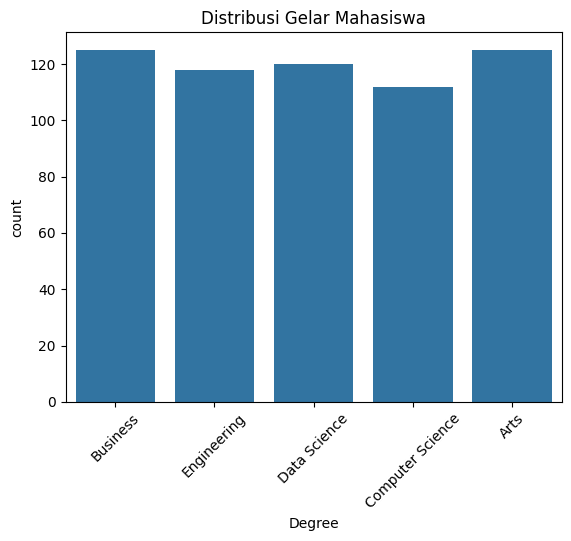

In [9]:
sns.countplot(data=df, x="Degree")
plt.title("Distribusi Gelar Mahasiswa")
plt.xticks(rotation=45)
plt.show()

Melihat rata-rata salary per degree

In [10]:
df.groupby("Degree")["Salary_Offered_USD"].mean().sort_values(ascending=False)

,Salary_Offered_USD
Degree,
Business,12093.479760
Computer Science,11847.669196
Arts,11841.084800
Engineering,11141.545339
Data Science,10941.675583


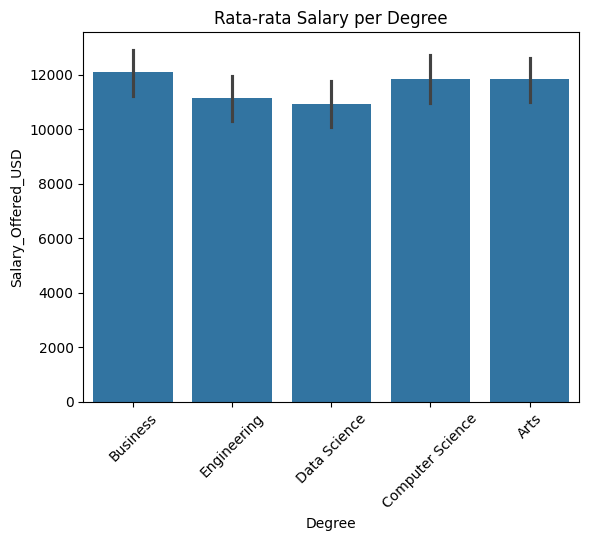

In [11]:
sns.barplot(data=df, x="Degree", y="Salary_Offered_USD", estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Rata-rata Salary per Degree")
plt.show()

Mengelompokkan Mahasiswa berdasarkan GCPA, dimana:
0-2.5 = low
2.5-3.0 = Average
3.0-3.5 = Good
3.5-4.0 = Excellent

In [12]:
bins = [0, 2.5, 3.0, 3.5, 4.0]
labels = ["Low (0-2.5)", "Average (2.5-3.0)", "Good (3.0-3.5)", "Excellent (3.5-4.0)"]

df["CGPA_Group"] = pd.cut(df["CGPA"], bins=bins, labels=labels)

In [13]:
df["CGPA_Group"].value_counts()

,count
CGPA_Group,
Low (0-2.5),162
Average (2.5-3.0),156
Excellent (3.5-4.0),149
Good (3.0-3.5),133


Memeriksa rata-rata gaji yang ditawarkan dengan kategori CGPA

In [14]:
df.groupby("CGPA_Group")["Salary_Offered_USD"].mean().sort_values(ascending=False)

/tmp/ipython-input-3608662699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("CGPA_Group")["Salary_Offered_USD"].mean().sort_values(ascending=False)


,Salary_Offered_USD
CGPA_Group,
Good (3.0-3.5),12450.499098
Excellent (3.5-4.0),11576.507852
Average (2.5-3.0),11328.807500
Low (0-2.5),11100.943951


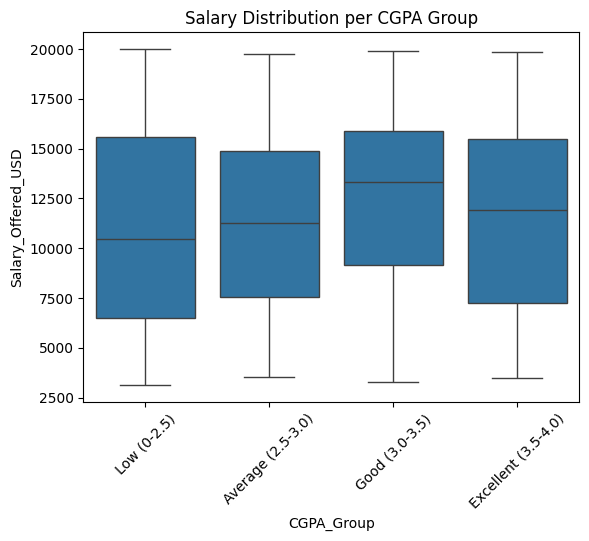

In [15]:
sns.boxplot(data=df, x="CGPA_Group", y="Salary_Offered_USD")
plt.xticks(rotation=45)
plt.title("Salary Distribution per CGPA Group")
plt.show()


Memeriksa korelasi antara technical skill dengan gaji yang ditawarkan

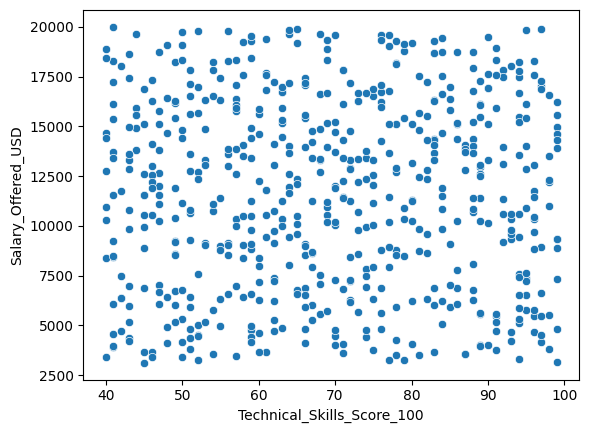

In [16]:
sns.scatterplot(data=df, x="Technical_Skills_Score_100", y="Salary_Offered_USD")
plt.show()

Memeriksa korelasi antara communication skill dengan gaji yang ditawarkan

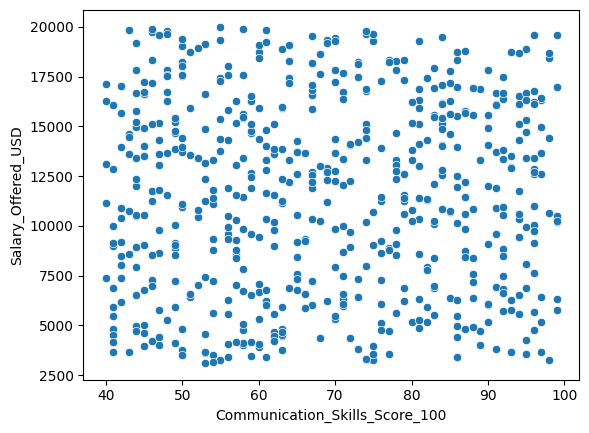

In [17]:
sns.scatterplot(data=df, x="Communication_Skills_Score_100", y="Salary_Offered_USD")
plt.show()

Korelasi antar fitur numerik

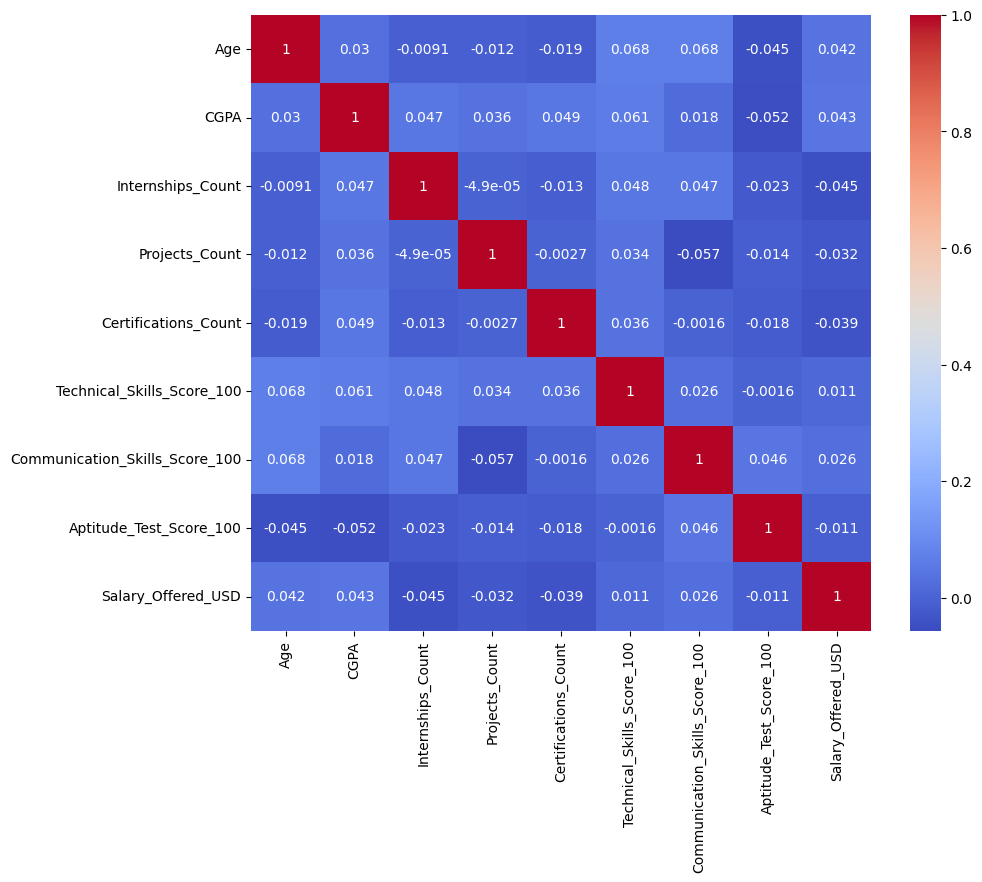

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

Memeriksa apakah pengalaman internship/ magang berpengaruh terhadap gaji yang ditawarkan

In [19]:
df.groupby("Internships_Count")["Salary_Offered_USD"].mean()


,Salary_Offered_USD
Internships_Count,
0,11772.766063
1,11737.230000
2,12023.386273
3,11059.527692
4,11378.508443


Memeriksa apakah pengalaman membuat project berpengaruh terhadap gaji yang ditawarkan

In [20]:
df.groupby("Projects_Count")["Salary_Offered_USD"].mean()


,Salary_Offered_USD
Projects_Count,
1,12085.610323
2,11467.494478
3,11672.134805
4,11664.352222
5,12106.383148
6,11431.833667
7,11336.975949
8,10551.287333
9,12133.072361


Encoding dan Modeling Menggunakan Random Forest

In [29]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

df_model = pd.get_dummies(df, columns=["Gender", "Degree", "CGPA_Group"], drop_first=True)

X = df_model.drop(columns=["Salary_Offered_USD", "Placement_Offer"])
y = df_model["Salary_Offered_USD"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
    )

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 4200.602493299498
RMSE: 4932.190290666178
R2: -0.08091178519618514


Faktor yang paling mempengaruhi gaji pada dataset

In [31]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(15)

,0
CGPA,0.175613
Aptitude_Test_Score_100,0.155551
Communication_Skills_Score_100,0.139846
Technical_Skills_Score_100,0.134867
Age,0.100768
Projects_Count,0.068243
Certifications_Count,0.054243
Internships_Count,0.051911
Degree_Engineering,0.021990
Degree_Data Science,0.020555
